In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the Iris dataset
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

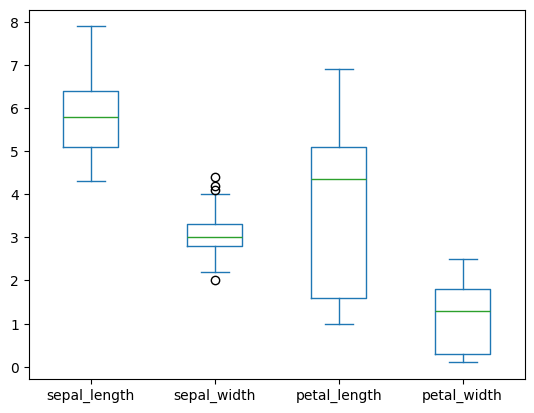

In [12]:
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].plot(kind='box', subplots =False)
plt.show()

In [15]:
data.species.value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [16]:
data.shape

(150, 5)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x,xt,y,yt = train_test_split(data.drop(columns='species'), 
                            data.species,
                            stratify=data.species,
                            test_size=0.2, 
                            random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
rf.score(xt,yt)

0.9333333333333333

In [22]:
rf.feature_importances_

array([0.12732999, 0.02016738, 0.39415654, 0.4583461 ])

<Axes: >

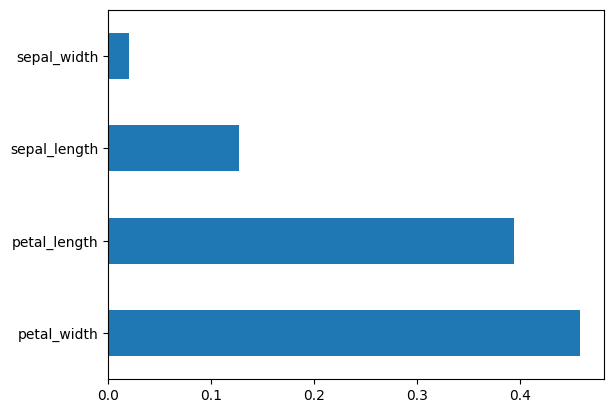

In [23]:
pd.Series(rf.feature_importances_, index=x.columns).nlargest(10).plot(kind='barh')

In [24]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada = AdaBoostClassifier()
ada.fit(x, y)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [27]:
gd = GradientBoostingClassifier()

In [29]:
gd.fit(x, y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [30]:
gd.score(xt, yt)

0.9666666666666667

In [ ]:
#pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.6/150.0 MB 3.2 MB/s eta 0:00:47
    --------------------------------------- 2.4/150.0 MB 3.4 MB/s eta 0:00:44
    --------------------------------------- 3.4/150.0 MB 4.0 MB/s eta 0:00:37
   - -------------------------------------- 4.5/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 5.5/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 7.6/150.0 MB 5.0 MB/s eta 0:00:29
   --- ------------------------------------ 11.5/150.0 MB 6.7 MB/s eta 0:00:21
   ---- -----


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [45]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
yt_num = y.replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_788\845138289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yt_num = y.replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})


In [47]:
xgb.fit(x, yt_num)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
xgb.score(x, yt_num)

1.0